In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , Normalizer ,MinMaxScaler , Binarizer, LabelEncoder, OneHotEncoder
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
%matplotlib inline
import xgboost
from xgboost import XGBClassifier, XGBRegressor
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("DATASET_FOR_LOAN.csv")

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.columns = data.columns.str.lower()

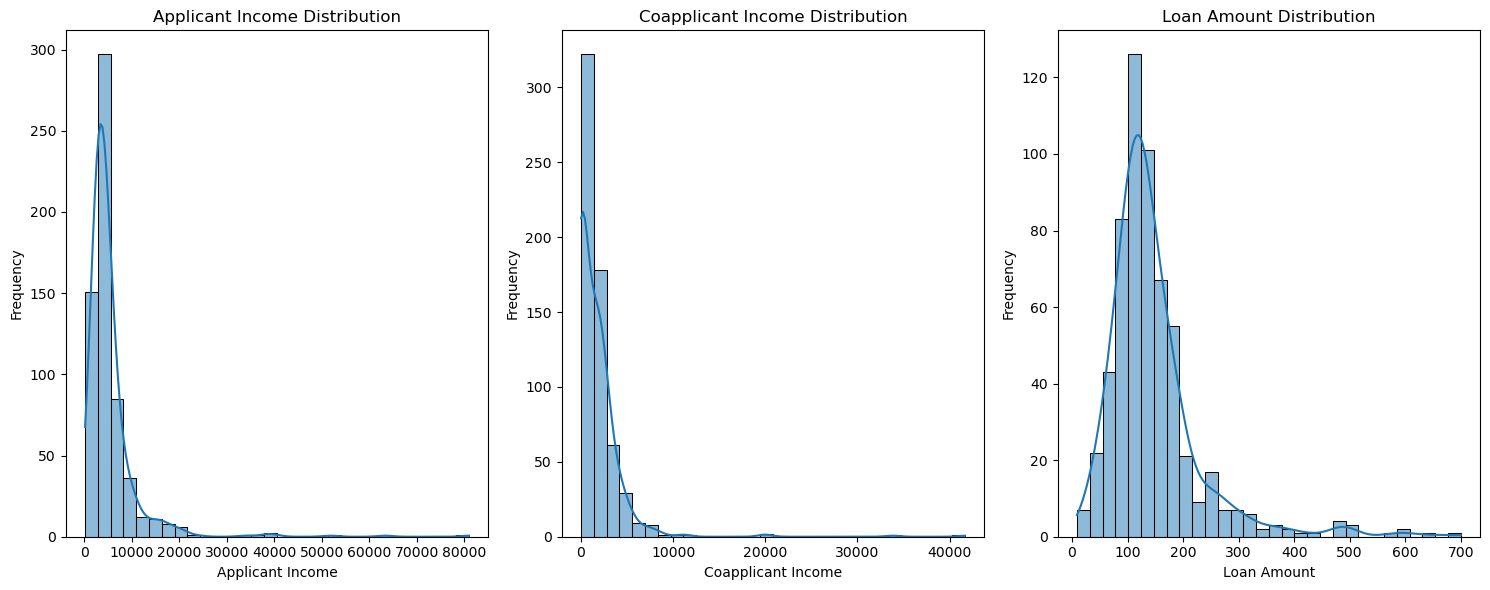

In [10]:
plt.figure(figsize=(15, 6))


plt.subplot(1, 3, 1)
sns.histplot(data['applicantincome'], kde=True, bins=30)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(data['coapplicantincome'], kde=True, bins=30)
plt.title('Coapplicant Income Distribution')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data['loanamount'], kde=True, bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

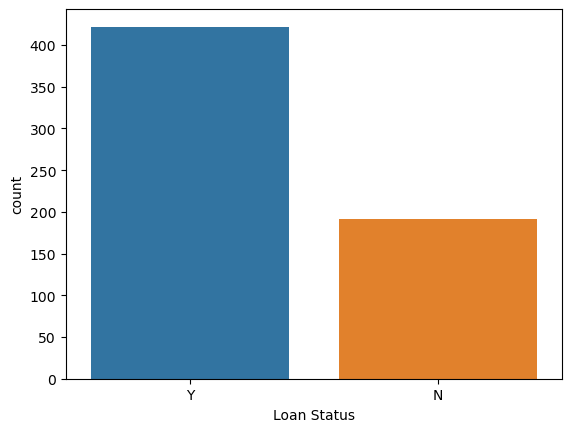

In [11]:
sns.countplot(x = data['loan_status'])
 
plt.xlabel('Loan Status')

plt.show()

In [13]:
counts = data['property_area'].value_counts()
urban = counts.get('Urban')
rural = counts.get('Rural')
semiurban = counts.get('Semiurban')

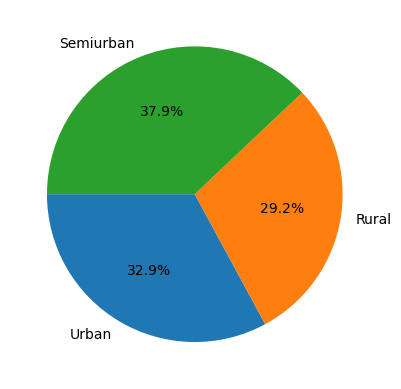

In [14]:
plt.pie([urban, rural, semiurban], labels=['Urban', 'Rural', 'Semiurban'], autopct='%1.1f%%', startangle=180)
plt.show()

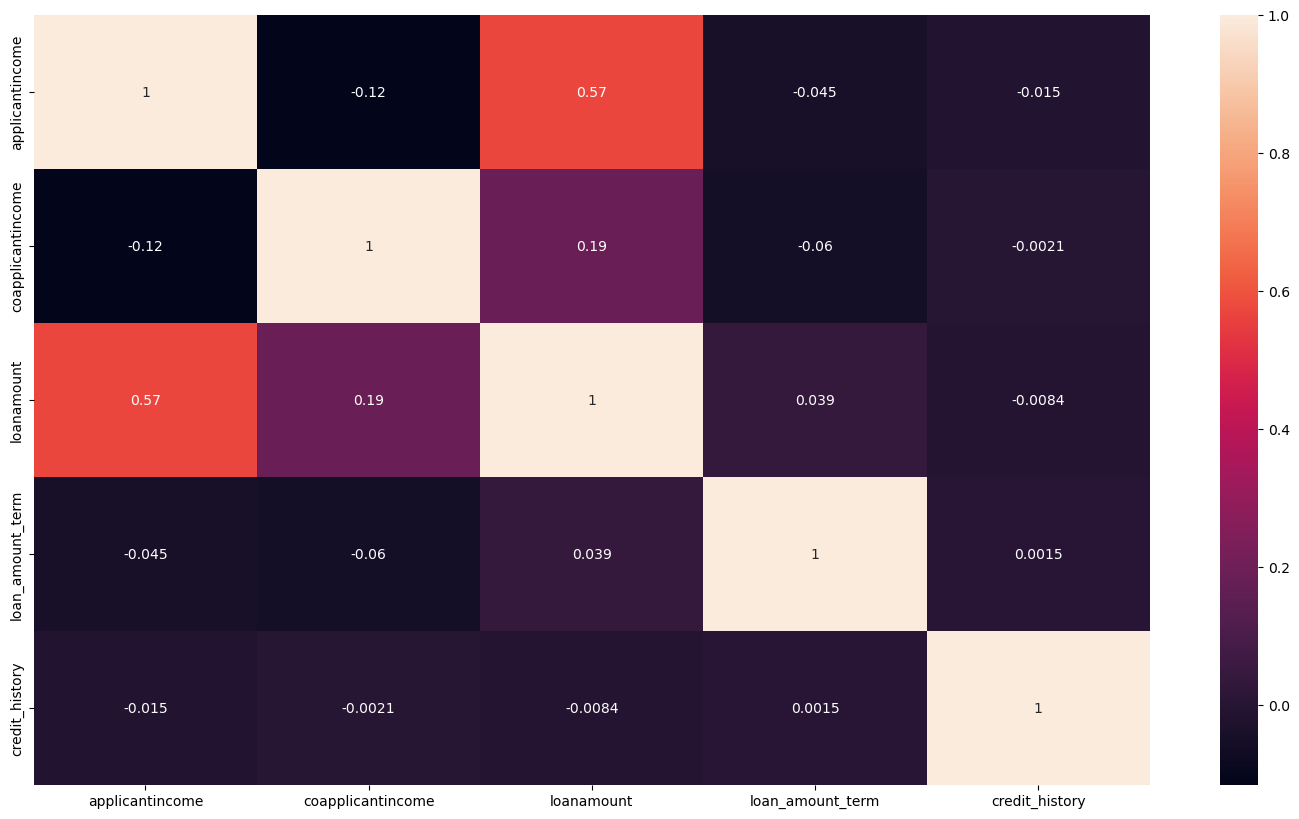

In [18]:
numeric_data = data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

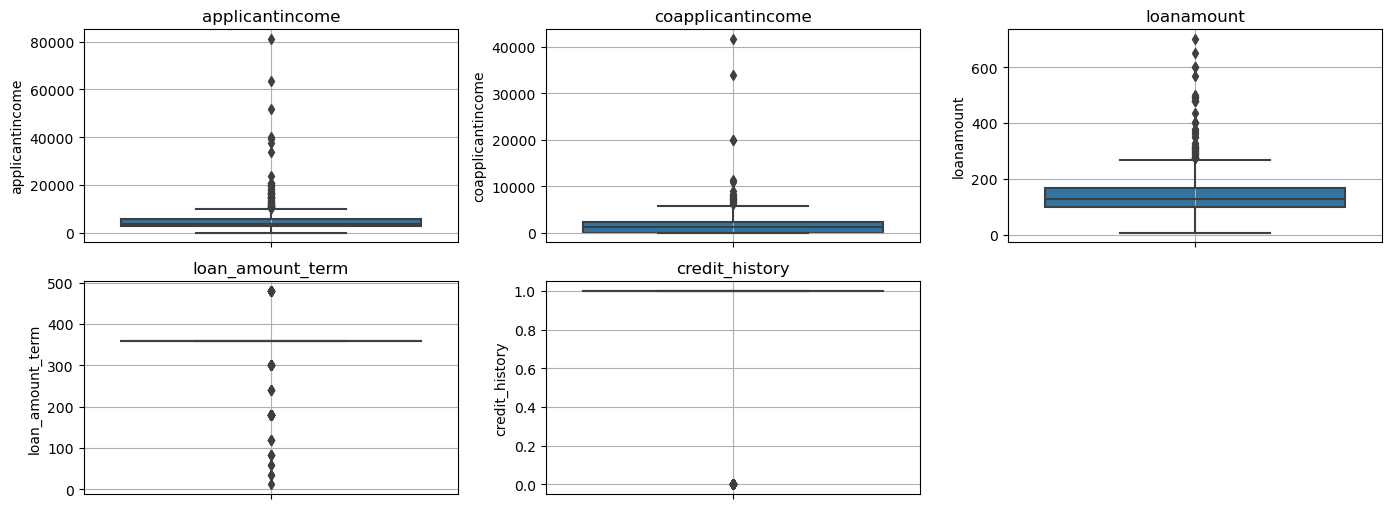

In [28]:
fig = plt.figure(figsize=(14, 15))

# Her sütun için boxplot oluşturma
for index, col in enumerate(data.columns):
    if pd.api.types.is_numeric_dtype(data[col]):
        plt.subplot(6, 3, index + 1)
        sns.boxplot(y=data[col], data=data)
        plt.title(col) 
        plt.grid()

fig.tight_layout(pad=1.0) 
plt.show()

# data cleaning

In [29]:
data = data.drop("loan_id", axis=1)

In [30]:
data

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
data.isnull().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [32]:
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['married'].fillna(data['married'].mode()[0], inplace=True)
data['credit_history'].fillna(data['credit_history'].mean(), inplace=True)
data['loan_amount_term'].fillna(data['loan_amount_term'].mean(), inplace=True)
data['loanamount'].fillna(data['loanamount'].mean(), inplace=True)
data['self_employed'].fillna(data['self_employed'].mode()[0], inplace=True)
data['dependents'].fillna(data['dependents'].mode()[0], inplace=True)

In [33]:
data.head(20)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N


In [34]:
data.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

# Encoding

In [35]:
label_enco = LabelEncoder()

In [36]:
data['gender']= label_enco.fit_transform(data["gender"])

In [37]:
data['loan_status']= label_enco.fit_transform(data["loan_status"])

In [38]:
data['married']= label_enco.fit_transform(data["married"])

In [39]:
data['education'] = label_enco.fit_transform(data['education'])

In [40]:
data['self_employed'] = label_enco.fit_transform(data['self_employed'])

In [41]:
data.head(10)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,Urban,1
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,Urban,1
7,1,1,3+,0,0,3036,2504.0,158.000000,360.0,0.0,Semiurban,0
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,Urban,1
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,Semiurban,0


In [42]:
data['property_area'] = data['property_area'].replace({'Urban': 0, 'Rural': 1, 'Semiurban': 2})
data['loan_status'] = data['loan_status'].replace({'Y': 1, 'N': 0})
data['dependents'] = data['dependents'].replace({'0': 0, '1': 1, '2':2,'3+':3})

In [43]:
data

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,0,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,0,1


# train test

In [44]:
y = data ['loan_status']

In [45]:
x = data.drop('loan_status',axis = 1)

In [46]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

# knn

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=19, weights='uniform')
param_grid = {
    'n_neighbors': np.arange(1, 31, 1),  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print('Best Parameters:', grid_search.best_params_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'uniform'}


In [48]:
knn_model = KNeighborsClassifier(n_neighbors=24, weights='uniform',metric = 'manhattan')
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
con_mat=confusion_matrix(y_test,y_pred)
accurcy = accuracy_score(y_test, y_pred)

print(con_mat)
print(accurcy)

[[  3  62]
 [  4 116]]
0.6432432432432432


Accurcy of KNN :
0.6432432432432432
Confusion Matrix of KNN :
[[  3  62]
 [  4 116]]


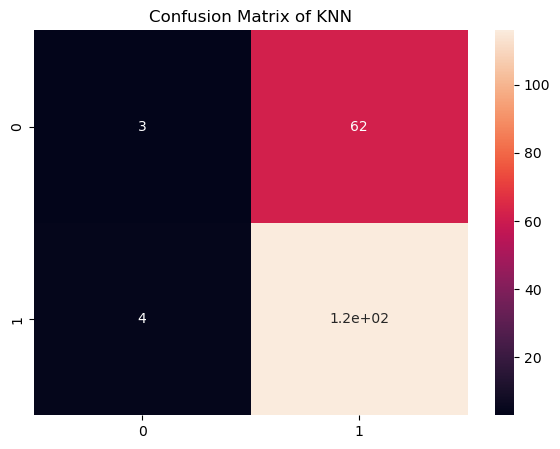

In [49]:
plt.figure(figsize=(7, 5))
print("Accurcy of KNN :")
print(accurcy)
print("Confusion Matrix of KNN :")
print(con_mat)
plt.title('Confusion Matrix of KNN')
sns.heatmap(con_mat,annot = True)
plt.show()

# rf

In [50]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_model= RandomForestClassifier() 
model=rf_model.fit(x_train,y_train) 

In [52]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [1, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [53]:
rf_model = RandomForestClassifier(max_depth = 20 , min_samples_split=5 , n_estimators = 200)
model=rf_model.fit(x_train,y_train) 

In [54]:
y_pred=model.predict(x_test)

con_mat = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

acc_score_2 = accuracy_score(y_test,y_pred)

class_rep_2 = classification_report(y_test,y_pred)

In [55]:
print(acc_score_2)

print(class_rep_2)

0.7891891891891892
              precision    recall  f1-score   support

           0       0.91      0.45      0.60        65
           1       0.76      0.97      0.86       120

    accuracy                           0.79       185
   macro avg       0.84      0.71      0.73       185
weighted avg       0.81      0.79      0.77       185



In [56]:
accuracy

0.7891891891891892

In [57]:
con_mat

array([[ 29,  36],
       [  3, 117]], dtype=int64)

Accuracy of Random Forest:
0.7891891891891892
Confusion Matrix of Random Forest:
[[ 29  36]
 [  3 117]]


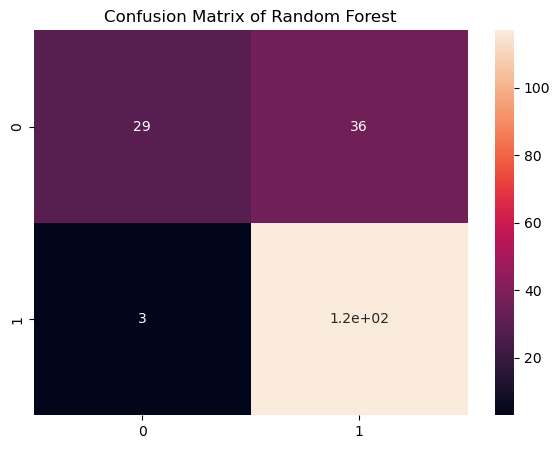

In [58]:
plt.figure(figsize=(7, 5))
print("Accuracy of Random Forest:")
print(accuracy)
print("Confusion Matrix of Random Forest:")
print(con_mat)
sns.heatmap(con_mat,annot = True)
plt.title('Confusion Matrix of Random Forest')
plt.show()

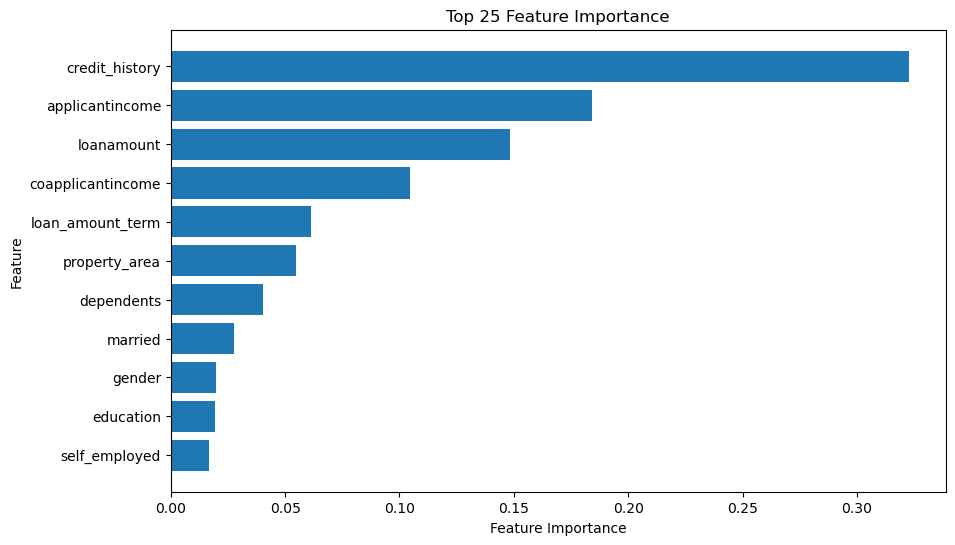

In [59]:
feature_importance = rf_model.feature_importances_
feature_names = x_train.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_features = 25
top_features_names, top_features_importance = zip(*sorted_feature_importance[:top_features])
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_names)), top_features_importance, align='center')
plt.yticks(range(len(top_features_names)), top_features_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importance'.format(top_features))
plt.gca().invert_yaxis()
plt.show()

# Decision Tree


In [60]:
decision_tree = DecisionTreeClassifier()

In [61]:
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30, 40, 50], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5}


In [62]:
decision_tree = DecisionTreeClassifier(criterion = 'gini' , max_depth = 20, min_samples_leaf = 6,min_samples_split = 2)

In [63]:
decision = decision_tree.fit(x_train,y_train)

In [64]:
y_pred = decision.predict(x_test)

In [65]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Accuracy: 0.6810810810810811
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.55      0.52      0.54        65
           1       0.75      0.77      0.76       120

    accuracy                           0.68       185
   macro avg       0.65      0.64      0.65       185
weighted avg       0.68      0.68      0.68       185



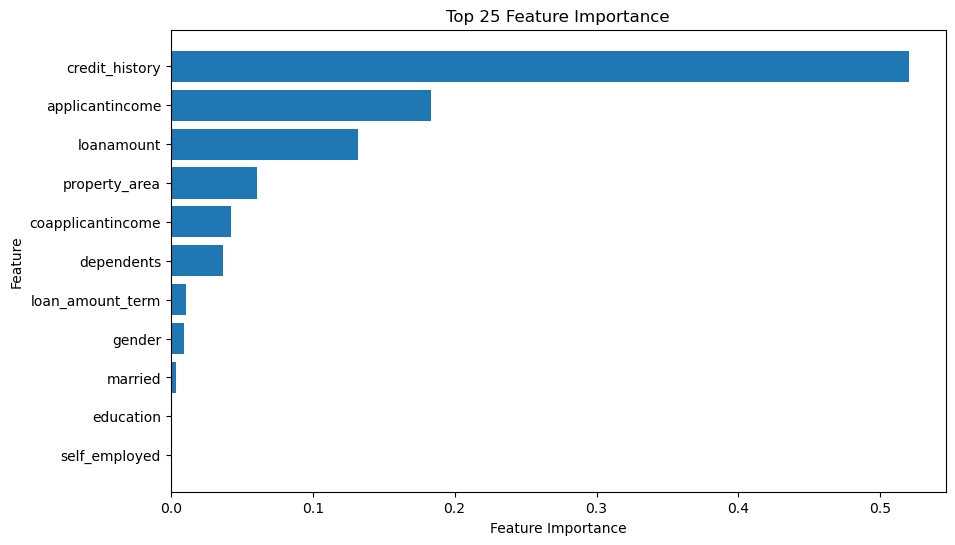

In [66]:
feature_importance = decision_tree.feature_importances_
feature_names = x_train.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_features = 25
top_features_names, top_features_importance = zip(*sorted_feature_importance[:top_features])
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_names)), top_features_importance, align='center')
plt.yticks(range(len(top_features_names)), top_features_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importance'.format(top_features))
plt.gca().invert_yaxis()
plt.show()

# SVM

In [67]:
from sklearn import svm
from sklearn.svm import SVC

In [68]:
svm = SVC(C = 0.5,gamma = 0.1,kernel = 'linear')

In [69]:
#param_grid = {
#    'C': [0.1, 1],
#    'gamma': [0.1, 0.01],
#    'kernel': ['linear', 'rbf']
#}


#grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(x_train, y_train)

#print('Best Parameters:', grid_search.best_params_)

In [70]:
svm.fit(x_train , y_train)

SVC(C=0.5, gamma=0.1, kernel='linear')

In [71]:
y_pred = svm.predict(x_test)

In [72]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.745945945945946


In [73]:
print("Classification Report for SVM:""\n",classification_report(y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       1.00      0.28      0.43        65
           1       0.72      1.00      0.84       120

    accuracy                           0.75       185
   macro avg       0.86      0.64      0.63       185
weighted avg       0.82      0.75      0.69       185



# Log Reg

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logmodel = LogisticRegression(max_iter = 1000)

In [76]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(logmodel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print('Best Parameters:', grid_search.best_params_)

C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters: {'C': 10, 'solver': 'lbfgs'}


C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [77]:
logmodel = LogisticRegression(max_iter = 1000 , C = 10 , solver = 'lbfgs')

In [78]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=10, max_iter=1000)

In [79]:
predictions = logmodel.predict(x_test)

In [80]:
predictions_proba = logmodel.predict_proba(x_test)

In [81]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(roc_auc_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        65
           1       0.76      0.98      0.86       120

    accuracy                           0.79       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.79      0.76       185

[[ 28  37]
 [  2 118]]
0.7070512820512821


# scaling


In [82]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [83]:
data.head(10)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,0,1
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,0,1
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,2,0
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,0,1
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,2,0


In [84]:
new_data = data.iloc[:,5:9]

In [85]:
scaled_data = mm.fit_transform(new_data)

In [86]:
scaled_data

array([[0.07048856, 0.        , 0.19885986, 0.74358974],
       [0.05482993, 0.03619171, 0.17221418, 0.74358974],
       [0.03525046, 0.        , 0.08248915, 0.74358974],
       ...,
       [0.09798392, 0.00575995, 0.35311143, 0.74358974],
       [0.09193568, 0.        , 0.25759768, 0.74358974],
       [0.05482993, 0.        , 0.17945007, 0.74358974]])

In [87]:
scaled_df = pd.DataFrame(data=scaled_data, columns=new_data.columns)

In [88]:
data = pd.concat([data, scaled_df], axis=1)

In [89]:
data.drop(['applicantincome','coapplicantincome','loanamount','loan_amount_term'],axis = 1,inplace = True)

In [90]:
df = pd.concat([data, scaled_df], axis=1)

In [91]:
df

,gender,married,dependents,education,self_employed,credit_history,property_area,loan_status,applicantincome,coapplicantincome,loanamount,loan_amount_term
0,1,0,0,0,0,1.0,0,1,0.070489,0.000000,0.198860,0.743590
1,1,1,1,0,0,1.0,1,0,0.054830,0.036192,0.172214,0.743590
2,1,1,0,0,1,1.0,0,1,0.035250,0.000000,0.082489,0.743590
3,1,1,0,1,0,1.0,0,1,0.030093,0.056592,0.160637,0.743590
4,1,0,0,0,0,1.0,0,1,0.072356,0.000000,0.191027,0.743590
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,1,1,0.034014,0.000000,0.089725,0.743590
610,1,1,3,0,0,1.0,1,1,0.048930,0.000000,0.044863,0.358974
611,1,1,1,0,0,1.0,0,1,0.097984,0.005760,0.353111,0.743590
612,1,1,2,0,0,1.0,0,1,0.091936,0.000000,0.257598,0.743590


# test-train for scaled

In [92]:
y = df['loan_status']
x = df.drop('loan_status',axis = 1)

In [93]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

# knn for scaled data

In [94]:
knn_model = KNeighborsClassifier(n_neighbors=19, weights='uniform')
param_grid = {
    'n_neighbors': np.arange(1, 31, 1), 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print('Best Parameters:', grid_search.best_params_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [95]:
knn_model = KNeighborsClassifier(n_neighbors=15, weights='distance',metric = 'manhattan')
knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)
con_mat=confusion_matrix(Y_test,Y_pred)
accurcy = accuracy_score(Y_test, Y_pred)

print(con_mat)
print(accurcy)

[[15 28]
 [ 3 77]]
0.7479674796747967


Accuracy of Random Forest:
0.7891891891891892
Confusion Matrix of Random Forest:
[[15 28]
 [ 3 77]]


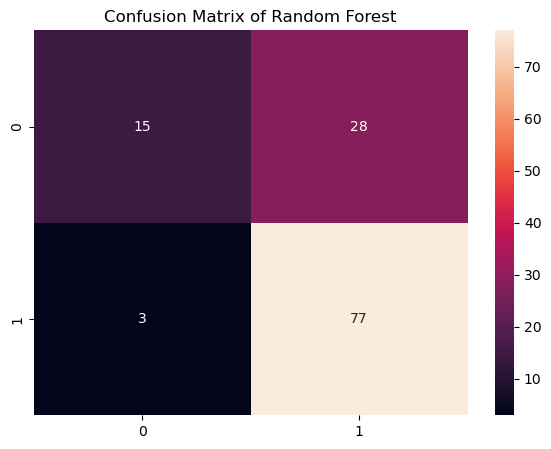

In [96]:
plt.figure(figsize=(7, 5))
print("Accuracy of Random Forest:")
print(accuracy)
print("Confusion Matrix of Random Forest:")
print(con_mat)
sns.heatmap(con_mat,annot = True)
plt.title('Confusion Matrix of Random Forest')
plt.show()

# rf


In [97]:
rf_model= RandomForestClassifier(max_depth=5) 
model=rf_model.fit(X_train,Y_train) 

In [98]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [1, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [99]:
rf_model = RandomForestClassifier(max_depth = 20 , min_samples_split = 5 , n_estimators = 100)

In [100]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5)

In [101]:
Y_pred=model.predict(X_test)

con_mat = confusion_matrix(Y_test, Y_pred)

accuracy = accuracy_score(Y_test, Y_pred)

acc_score_2 = accuracy_score(Y_test,Y_pred)

class_rep_2 = classification_report(Y_test,Y_pred)

In [102]:
model.score(X_test,Y_test)

0.7886178861788617

In [103]:
print(con_mat)
print(accuracy)
print(class_rep_2)

[[18 25]
 [ 1 79]]
0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Accuracy of Random Forest:
0.7886178861788617
Confusion Matrix of Random Forest:
[[18 25]
 [ 1 79]]


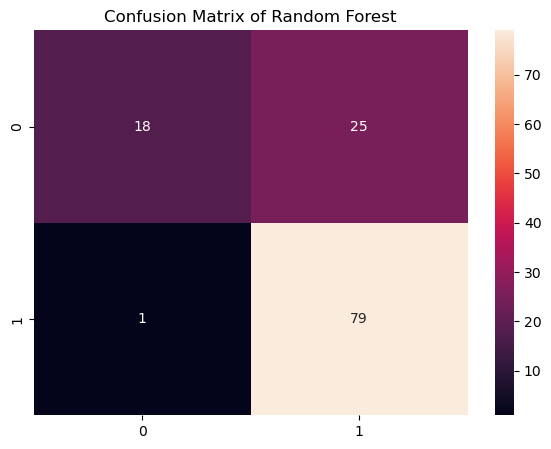

In [104]:
plt.figure(figsize=(7, 5))
print("Accuracy of Random Forest:")
print(accuracy)
print("Confusion Matrix of Random Forest:")
print(con_mat)
sns.heatmap(con_mat,annot = True)
plt.title('Confusion Matrix of Random Forest')
plt.show()

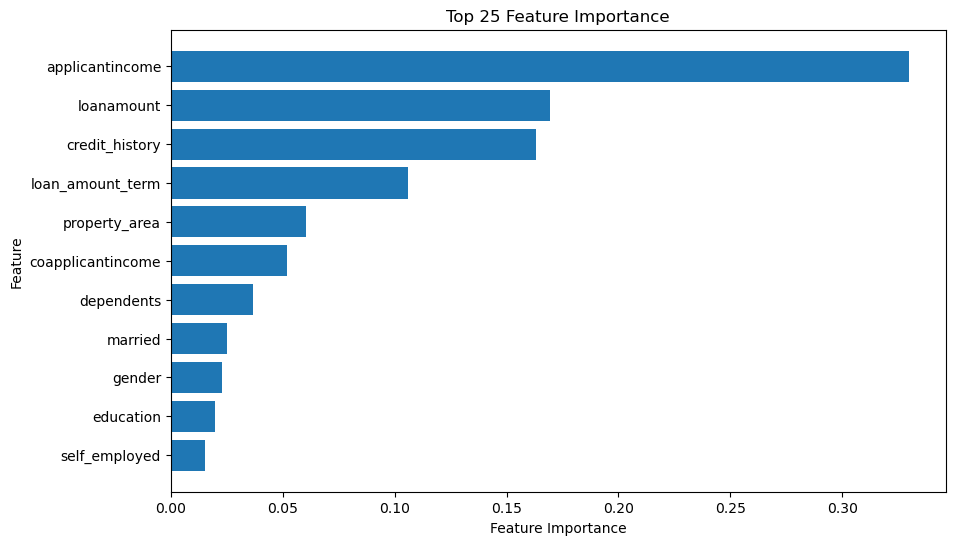

In [105]:
feature_importance = rf_model.feature_importances_
feature_names = x_train.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_features = 25
top_features_names, top_features_importance = zip(*sorted_feature_importance[:top_features])
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_names)), top_features_importance, align='center')
plt.yticks(range(len(top_features_names)), top_features_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importance'.format(top_features))
plt.gca().invert_yaxis()
plt.show()

# Log reg

In [106]:
logmodel = LogisticRegression()

In [107]:
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [108]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # C parametresi (regularization parameter)
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Çözüm algoritmaları
}

grid_search = GridSearchCV(logmodel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print('Best Parameters:', grid_search.best_params_)

C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 1, 'solver': 'liblinear'}


C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\thelk\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [109]:
logmodel = LogisticRegression(C = 1 , solver = 'liblinear')

In [110]:
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1, solver='liblinear')

In [111]:
predictions = logmodel.predict(X_test)

In [112]:
predictions_proba = logmodel.predict_proba(X_test)

In [113]:
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(roc_auc_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

[[18 25]
 [ 1 79]]
0.7030523255813954


# SVM scaled

In [114]:
svm = SVC()

In [115]:
 param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [116]:
svm = SVC(C = 0.1 , gamma = 1 , kernel = 'linear')

In [117]:
svm.fit(X_train , Y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [118]:
y_pred = svm.predict(X_test)

In [119]:
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.7886178861788617


In [120]:
print("Classification Report for SVM:""\n",classification_report(Y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



# Boosting

In [121]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimators = 7,
             random_state = 42)

In [122]:
xgbt.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=7, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [123]:
xgbt_pred = xgbt.predict(X_test)

In [124]:
accuracy_score(Y_test, xgbt_pred)

0.7886178861788617